In [2]:
import pandas as pd
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv("dataset_sudeste_simples_realista_outliers-2k-limpo-01-07.csv")

df.info ()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     2000 non-null   int64  
 1   idade                  2000 non-null   float64
 2   renda                  2000 non-null   float64
 3   nota                   2000 non-null   float64
 4   cidade_Belo Horizonte  2000 non-null   bool   
 5   cidade_Desconhecido    2000 non-null   bool   
 6   cidade_Rio de Janeiro  2000 non-null   bool   
 7   cidade_São Paulo       2000 non-null   bool   
 8   cidade_Vitória         2000 non-null   bool   
 9   categoria_A            2000 non-null   bool   
 10  categoria_B            2000 non-null   bool   
 11  feedback_Bom           2000 non-null   bool   
 12  feedback_Desconhecido  2000 non-null   bool   
 13  feedback_Regular       2000 non-null   bool   
 14  feedback_Ruim          2000 non-null   bool   
dtypes: b

In [5]:
features = df[['idade', 'renda', 'nota']]
target   = df['feedback_Bom']

X_train, X_test, y_train, y_test = train_test_split(features, target, 
                                                    test_size=0.3, random_state=42)

In [6]:
features.head(5)

,idade,renda,nota
0,35.0,11669.80,0.3
1,28.0,12823.74,7.4
2,56.0,3537.12,0.6
3,19.0,4960.32,1.5
4,69.0,1645.34,3.7


In [7]:
target.head(5)

0    False
1    False
2    False
3     True
4    False
Name: feedback_Bom, dtype: bool

In [8]:
X_train.head(5)

,idade,renda,nota
836,48.0,4917.05,3.3
575,63.0,2285.17,2.3
557,26.0,11034.14,9.5
1235,41.0,1358.52,2.7
1360,39.0,11615.76,2.4


In [9]:
y_train.head(5)

836     False
575     False
557      True
1235    False
1360    False
Name: feedback_Bom, dtype: bool

In [10]:
X_test.head(5)

,idade,renda,nota
1860,21.0,5813.84,7.2
353,69.0,8147.77,8.6
1333,57.0,12126.80,3.5
905,65.0,11699.62,9.6
1289,57.0,6781.84,8.1


In [11]:
y_test.head(5)

1860    False
353      True
1333     True
905     False
1289    False
Name: feedback_Bom, dtype: bool

In [12]:
X_train_t = torch.tensor(X_train.values, dtype=torch.float32)
y_train_t = torch.tensor(y_train.values, dtype=torch.float32).view(-1, 1)

X_test_t = torch.tensor(X_test.values, dtype=torch.float32)
y_test_t = torch.tensor(y_test.values, dtype=torch.float32).view(-1, 1)

In [13]:
print(X_train_t.shape) 
print(y_train_t.shape) 

torch.Size([1400, 3])
torch.Size([1400, 1])


In [14]:
X_train_t[0:5]

tensor([[4.8000e+01, 4.9170e+03, 3.3000e+00],
        [6.3000e+01, 2.2852e+03, 2.3000e+00],
        [2.6000e+01, 1.1034e+04, 9.5000e+00],
        [4.1000e+01, 1.3585e+03, 2.7000e+00],
        [3.9000e+01, 1.1616e+04, 2.4000e+00]])

In [15]:
y_train_t[0:5]

tensor([[0.],
        [0.],
        [1.],
        [0.],
        [0.]])

In [16]:
X_test_t[0:5]

tensor([[2.1000e+01, 5.8138e+03, 7.2000e+00],
        [6.9000e+01, 8.1478e+03, 8.6000e+00],
        [5.7000e+01, 1.2127e+04, 3.5000e+00],
        [6.5000e+01, 1.1700e+04, 9.6000e+00],
        [5.7000e+01, 6.7818e+03, 8.1000e+00]])

In [17]:
y_test_t[0:5]

tensor([[0.],
        [1.],
        [1.],
        [0.],
        [0.]])

In [18]:
class SimpleNet(nn.Module):
    
    def __init__(self, input_dim):
        super(SimpleNet, self).__init__()
        self.linear1 = nn.Linear(input_dim, 8)
        self.relu    = nn.ReLU()
        self.linear2 = nn.Linear(8, 1)

    def forward(self, x):
        x = self.linear1(x)
        x = self.relu(x)
        x = self.linear2(x)
        return x

In [19]:
# Quantidade de colunas em X
X_train_t.shape[1] 

3

In [20]:
# Cria um modelo que aceita uma matriz de 3 colunas
input_dim = X_train_t.shape[1]  
model = SimpleNet(input_dim)

In [21]:
# Imprime a estrutura do modelo
print(model)

SimpleNet(
  (linear1): Linear(in_features=3, out_features=8, bias=True)
  (relu): ReLU()
  (linear2): Linear(in_features=8, out_features=1, bias=True)
)


In [22]:
criterion = nn.BCEWithLogitsLoss()
optimizer = optim.Adam(model.parameters(), lr=0.01)

In [23]:
# Qt de fases de treinamenro
epochs = 100
# Lista para guardar o valor da loss em cada época
losses = []  

for epoch in range(epochs):
    # forward
    ## faz a predição com base nos dados de entrada
    outputs = model(X_train_t)
    
    ## compara essas previsões com os verdadeiros rótulos (y_train_t) e calcula o erro (loss)
    loss = criterion(outputs, y_train_t)

    # backward
    ## Zera os gradientes acumulados nas etapas anteriores
    ## Se não zerar, os gradientes vão se somar e causar atualizações erradas nos pesos
    optimizer.zero_grad()

    ## Faz o cálculo dos gradientes de erro em relação aos pesos do modelo
    ## É o coração do backpropagation    
    loss.backward()

    ## Usa os gradientes calculados para atualizar os pesos do modelo
    ## O otimizador (Adam, neste caso) decide como ajustar os pesos
    optimizer.step()

    # Armazenar loss
    losses.append(loss.item())

    # imprimir estatísticas
    if (epoch+1) % 2 == 0:
        print(f"Época [{epoch+1}/{epochs}], Perda Treino: {loss.item():.4f}")

Época [2/100], Perda Treino: 1982.3121
Época [4/100], Perda Treino: 1670.6949
Época [6/100], Perda Treino: 1385.3756
Época [8/100], Perda Treino: 1122.3668
Época [10/100], Perda Treino: 875.5829
Época [12/100], Perda Treino: 643.9598
Época [14/100], Perda Treino: 425.6485
Época [16/100], Perda Treino: 218.0807
Época [18/100], Perda Treino: 18.8882
Época [20/100], Perda Treino: 84.1752
Época [22/100], Perda Treino: 145.9890
Época [24/100], Perda Treino: 181.8850
Época [26/100], Perda Treino: 197.2404
Época [28/100], Perda Treino: 196.6199
Época [30/100], Perda Treino: 183.8403
Época [32/100], Perda Treino: 162.0372
Época [34/100], Perda Treino: 133.7381
Época [36/100], Perda Treino: 100.9354
Época [38/100], Perda Treino: 65.1547
Época [40/100], Perda Treino: 27.5179
Época [42/100], Perda Treino: 21.2078
Época [44/100], Perda Treino: 58.8974
Época [46/100], Perda Treino: 58.6154
Época [48/100], Perda Treino: 29.1342
Época [50/100], Perda Treino: 11.5836
Época [52/100], Perda Treino: 30.3

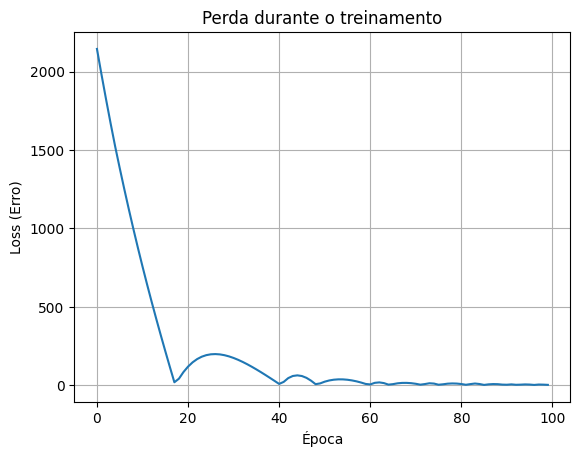

In [24]:
# ----------------------------------------------------------
# 8) GERAR GRÁFICO DA PERDA AO LONGO DAS ÉPOCAS
# ----------------------------------------------------------
plt.plot(losses)
plt.title("Perda durante o treinamento")
plt.xlabel("Época")
plt.ylabel("Loss (Erro)")
plt.grid(True)
plt.show()

In [25]:
with torch.no_grad():

    # Submete os dados de teste ao modelo
    logits_test = model(X_test_t)
    #print (logits_test)
    
    # Transformar logits em probabilidades [0..1]
    probs_test = torch.sigmoid(logits_test)
    #print (probs_test)

    # prob > 0.5 => classe = 1 (Bom)
    #print ((probs_test > 0.5).float())

    # Verifica a probabilidade é maior que 0.5
    # se for atribui 1, senão 0 
    preds_test = (probs_test > 0.5).float()

    # Verifica o total de acertos
    acertos = (preds_test == y_test_t).sum().item()

    # Verifica a quantidade de elementos do grupo de teste
    total = y_test_t.shape[0]

    # calcula a taxa de acerto
    acuracia_test = acertos / total * 100.0

print(f"Qtd de Elementos  : {acertos:-6.2f}")
print(f"Qtd de Acertos    : {total:-6.2f}")
print(f"Acurácia no teste : {acuracia_test:-6.2f}%")

Qtd de Elementos  : 397.00
Qtd de Acertos    : 600.00
Acurácia no teste :  66.17%
